In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
# Load the datasets
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
val = pd.read_csv("dataset/val.csv")
sample_submission = pd.read_csv("dataset/sample_submission.csv")

In [3]:
# Shape and columns
print("Train:", train.shape)
print("Test:", test.shape)
print("Val:", val.shape)

# First few rows
train.head()

Train: (1914056, 45)
Test: (546874, 44)
Val: (273437, 45)


,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Championship_Points,Championship_Position,Session,year_x,sequence,rider,team,bike,position,points,shortname,circuit_name,rider_name,team_name,bike_name,Lap_Time_Seconds,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,weather,track,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,Hard,+3s,100,20,FP3,2021,16,2639,615,258,9,7.0,EMI,Misano,"Ogura, Ai",IDEMITSU Honda Team Asia,Kalex,70.667,18,0.0042,4.09,23.0,27.3,Clear,Dry,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,Medium,+5s,137,7,Race,1977,4,900,1,4,5,6.0,NAT,Imola,"North, Alan",?,Yamaha,103.497,23,0.0025,4.64,34.3,41.8,Raining,Wet,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,Hard,DNF,43,17,Race,1985,2,1160,1,2,10,1.0,SPA,Jarama,"Biliotti, Fabio",?,Honda,78.400,19,0.0044,2.67,20.6,27.1,Cloudy,Dry,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,Hard,DNS,234,13,Race,2007,16,1693,206,15,11,5.0,AUS,Phillip Island,"Locatelli, Roberto",Metis Gilera,Gilera,81.338,12,0.0034,4.69,20.9,29.1,Clear,Dry,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,Medium,DNS,306,8,FP3,2018,7,2450,568,6,6,10.0,CAT,Catalunya,"Binder, Brad",Red Bull KTM Ajo,KTM,108.626,23,0.0017,4.84,29.1,43.4,Cloudy,Dry,22,31,175,146,132,29,17,2011,2021,11


In [4]:
test.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Championship_Points,Championship_Position,Session,year_x,sequence,rider,team,bike,position,points,shortname,circuit_name,rider_name,team_name,bike_name,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,weather,track,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,288307,6533,MotoGP,5.316,19,1,284.38,Dry,44,Hard,Soft,Ride Through,190,18,Qualifying,1984,6,1131,1,149,7,4.0,FRA,Paul Ricard,"Vitali, Maurizio",?,MBA,24,0.0046,3.73,27.6,35.3,Sunny,Dry,16,19,92,86,47,2,0,1981,1993,13
1,704288,4800,Moto2,3.861,19,2,328.98,Dry,43,Hard,Soft,+3s,349,10,FP4,2010,1,1762,197,4,1,25.0,QAT,Losail,"Rossi, Valentino",Fiat Yamaha Team,Yamaha,21,0.0023,3.04,15.2,28.1,Sunny,Dry,28,47,406,373,365,178,111,1996,2021,26
2,951491,7907,Moto3,3.954,18,21,165.56,Dry,77,Soft,Medium,DNS,39,2,FP3,1999,8,1660,1,5,8,8.0,GBR,Donington Park,"Roberts Jr, Kenny",?,Suzuki,17,0.0011,3.15,18.9,24.9,Sunny,Dry,27,46,138,134,120,13,7,1993,2007,15
3,2591721,4844,Moto3,4.074,21,21,258.46,Dry,74,Medium,Soft,DNS,50,12,FP4,1999,9,1906,1,2,21,0.0,GER,Sachsenring,"Heidolf, Dirk",?,Honda,24,0.0029,4.77,34.9,39.4,Cloudy,Dry,21,29,83,70,37,0,0,1998,2007,10
4,1202653,4802,Moto2,4.096,25,21,319.60,Dry,84,Hard,Hard,DNF,135,3,FP4,2010,8,1891,414,244,-1,0.0,GER,Sachsenring,"Debon, Alex",Aeroport de Castello - Ajo,FTR,14,0.0033,3.05,28.6,31.5,Sunny,Dry,27,46,134,115,105,5,2,1998,2010,13


In [5]:
val.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Championship_Points,Championship_Position,Session,year_x,sequence,rider,team,bike,position,points,shortname,circuit_name,rider_name,team_name,bike_name,Lap_Time_Seconds,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,weather,track,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1733872,6065,Moto2,4.248,24,5,293.12,Wet,33,Hard,Medium,NaN,261,13,FP1,1969,7,461,1,45,7,4.0,EGER,Sachsenring,"Carruthers, Kel",?,Aermacchi,95.192,21,0.0027,3.26,22.4,29.3,Cloudy,Dry,22,31,54,54,49,15,6,1966,1970,5
1,1778161,5781,Moto2,4.907,20,2,310.31,Wet,32,Soft,Soft,DNS,134,9,FP1,2004,11,1792,1,7,-4,0.0,POR,Estoril,"Jenkner, Steve",?,Aprilia,83.167,20,0.0031,2.65,32.8,37.8,Sunny,Dry,26,35,120,110,89,4,1,1996,2005,10
2,1205004,3780,Moto2,4.162,24,15,237.39,Wet,89,Medium,Medium,+5s,44,5,Sprint,2002,1,2015,1,2,8,8.0,JPN,Suzuka,"Pedrosa, Dani",?,Honda,95.071,13,0.0036,2.78,28.5,32.5,Sunny,Dry,28,47,290,262,258,105,54,2001,2021,19
3,578473,8193,MotoGP,3.889,18,3,275.55,Wet,32,Soft,Medium,NaN,331,7,Sprint,2009,7,1891,355,7,6,10.0,NED,Assen,"Debon, Alex",Aeropuerto-Castello-Blusens,Aprilia,103.764,11,0.0034,2.41,29.7,37.7,Cloudy,Dry,22,31,134,115,105,5,2,1998,2010,13
4,2248803,1632,Moto2,4.088,24,19,297.81,Wet,59,Soft,Medium,+3s,266,23,FP4,2011,11,2384,519,62,9,7.0,CZE,Brno,"Khairuddin, Zulfahmi",Airasia-Sic-Ajo,Derbi,91.736,11,0.0021,2.52,19.8,26.7,Sunny,Dry,26,35,106,86,45,1,0,2010,2018,7


In [6]:
# Check null values in train.csv
train.isnull().sum().sort_values(ascending=False)

Penalty                            321292
Rider_ID                                0
category_x                              0
Circuit_Length_km                       0
Unique ID                               0
Laps                                    0
Grid_Position                           0
Track_Condition                         0
Avg_Speed_kmh                           0
Humidity_%                              0
Tire_Compound_Front                     0
Tire_Compound_Rear                      0
Championship_Points                     0
Championship_Position                   0
Session                                 0
year_x                                  0
sequence                                0
rider                                   0
team                                    0
bike                                    0
position                                0
points                                  0
shortname                               0
circuit_name                      

In [7]:
# Check datatypes
train.dtypes

Unique ID                            int64
Rider_ID                             int64
category_x                          object
Circuit_Length_km                  float64
Laps                                 int64
Grid_Position                        int64
Avg_Speed_kmh                      float64
Track_Condition                     object
Humidity_%                           int64
Tire_Compound_Front                 object
Tire_Compound_Rear                  object
Penalty                             object
Championship_Points                  int64
Championship_Position                int64
Session                             object
year_x                               int64
sequence                             int64
rider                                int64
team                                 int64
bike                                 int64
position                             int64
points                             float64
shortname                           object
circuit_nam

Text(0.5, 0, 'Lap Time (Seconds)')

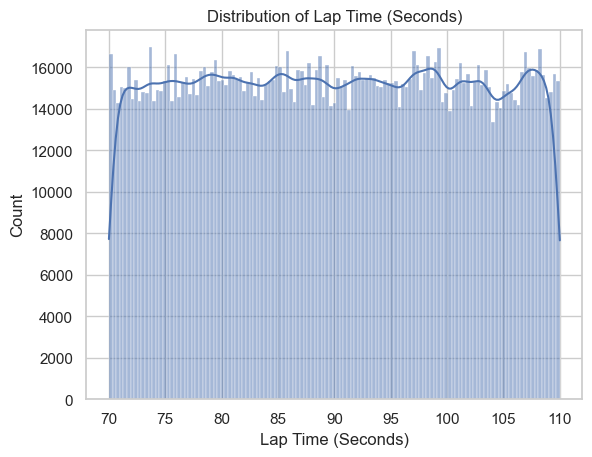

In [8]:
sns.histplot(train['Lap_Time_Seconds'], kde=True)
plt.title("Distribution of Lap Time (Seconds)")
plt.xlabel("Lap Time (Seconds)")

Text(0.5, 1.0, 'Feature Correlation Matrix')

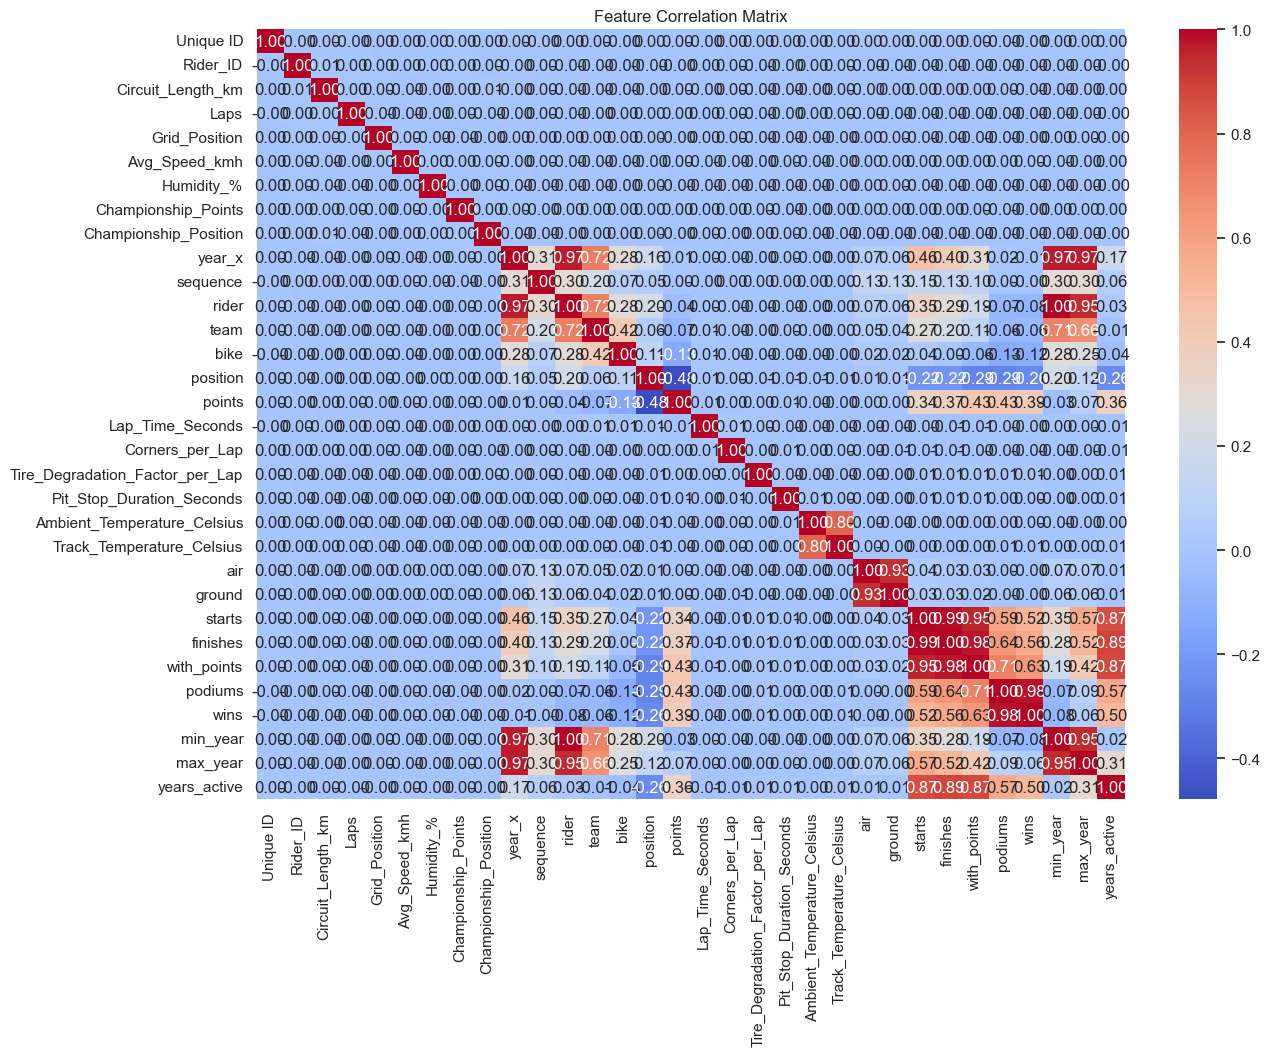

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")

<Axes: >

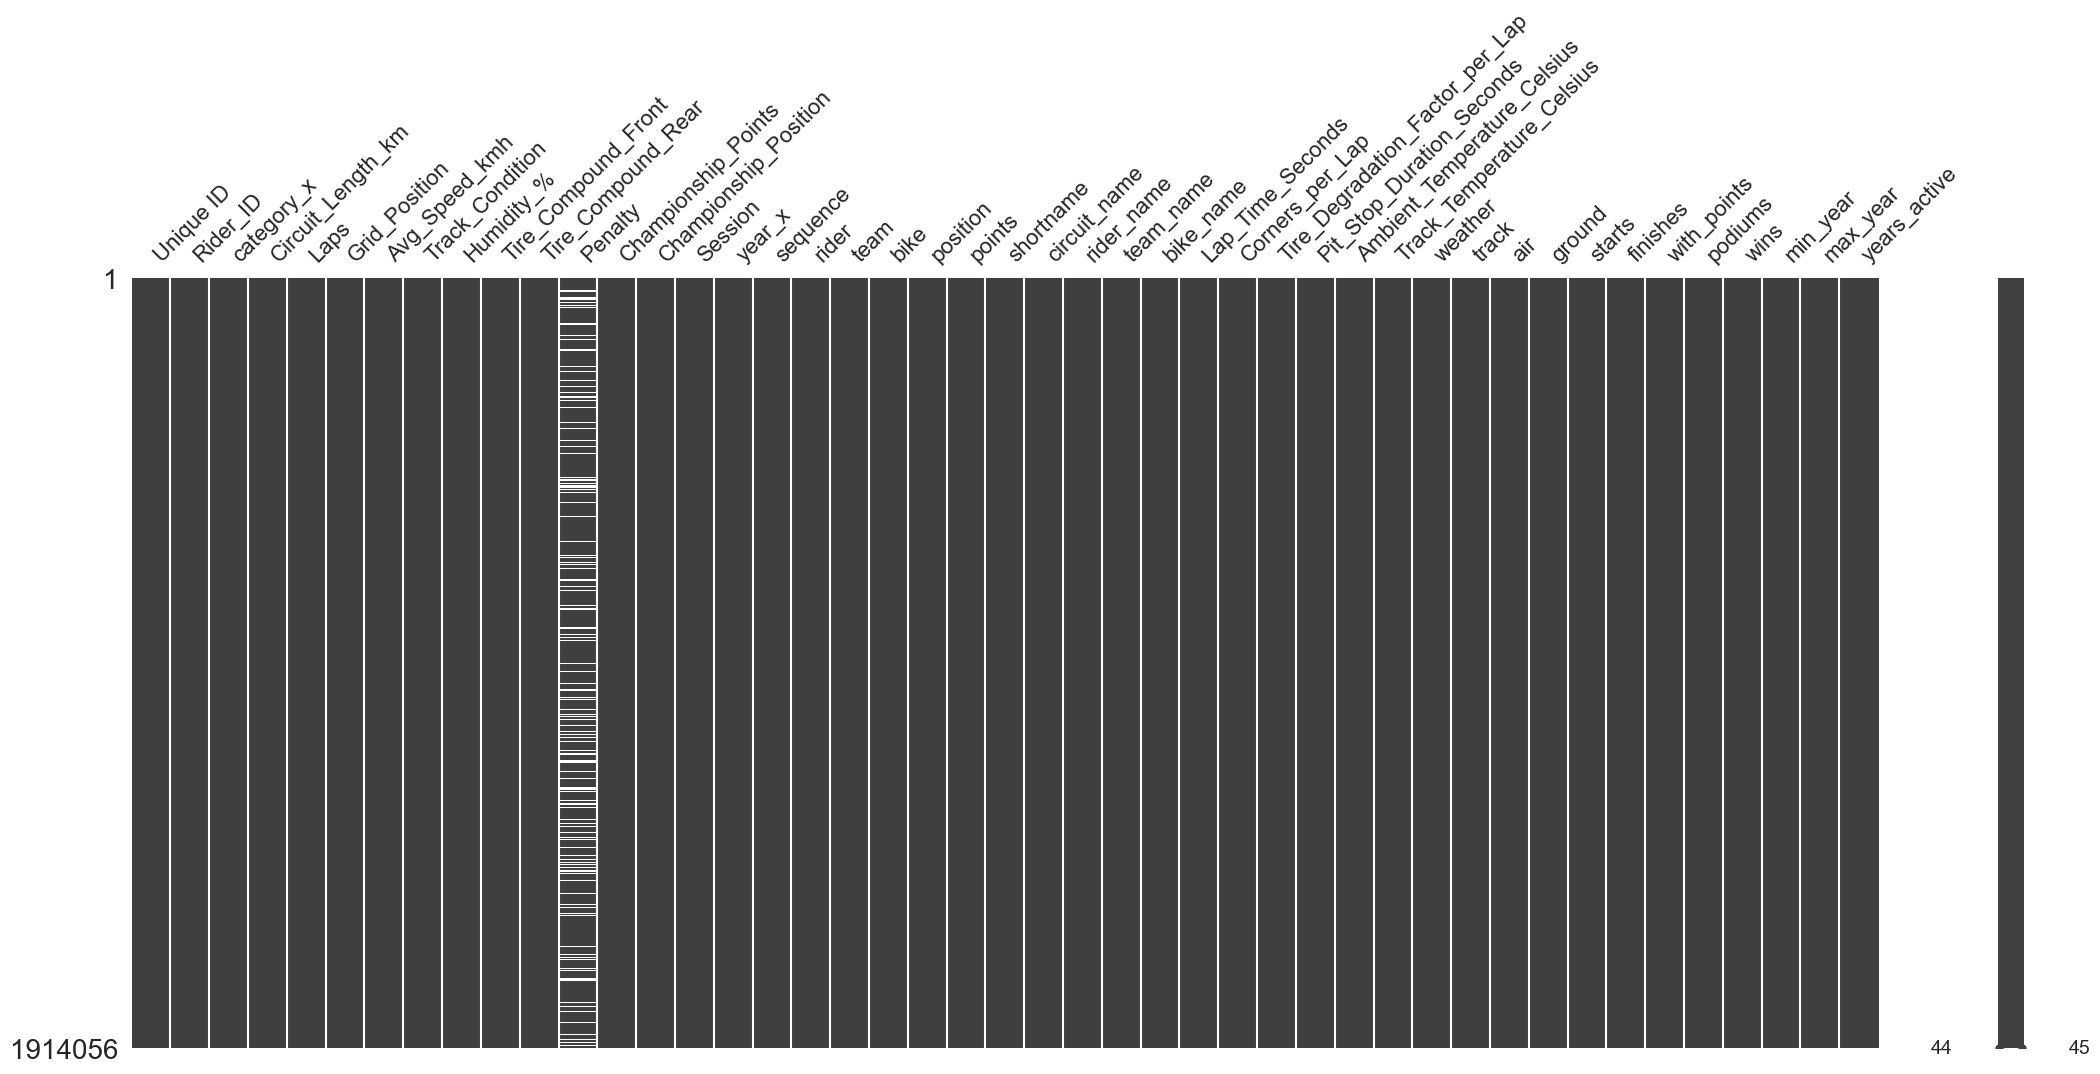

In [10]:
import missingno as msno
msno.matrix(train)

In [11]:

missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Penalty    321292
dtype: int64


In [14]:
# Drop columns with too many missing values (if any)
threshold = 0.5
train = train.drop(columns=[col for col in train.columns if train[col].isnull().mean() > threshold])

# Fill categorical features
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill numerical features
num_cols = train.select_dtypes(include=np.number).columns
for col in num_cols:
    train[col].fillna(train[col].median(), inplace=True)


C:\Users\zanwa\AppData\Local\Temp\ipykernel_1676\3551060744.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
C:\Users\zanwa\AppData\Local\Temp\ipykernel_1676\3551060744.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [21]:
cat_cols = train.select_dtypes(include='object').columns.tolist()
print(cat_cols)

[]


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_cols:
    # Convert to string and fill NaNs
    train[col] = train[col].astype(str).fillna("missing")
    test[col] = test[col].astype(str).fillna("missing")
    val[col] = val[col].astype(str).fillna("missing")

    # Fit LabelEncoder on training data
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

    # Ensure test and val only contain known classes
    known_classes = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_classes else "missing")
    val[col] = val[col].apply(lambda x: x if x in known_classes else "missing")

    # Update LabelEncoder if 'missing' was not in training
    if "missing" not in le.classes_:
        le.classes_ = np.append(le.classes_, "missing")

    # Transform test and val
    test[col] = le.transform(test[col])
    val[col] = le.transform(val[col])

    label_encoders[col] = le


In [24]:
# Correlation with Lap_Time_Seconds
corr = train.corr(numeric_only=True)['Lap_Time_Seconds'].sort_values(ascending=False)
print(corr.head(10))   # Top positively correlated
print(corr.tail(10))   # Top negatively correlated

Lap_Time_Seconds    1.000000
team_name           0.008888
Corners_per_Lap     0.008514
team                0.007372
bike                0.006116
position            0.005892
track               0.005357
bike_name           0.005052
rider               0.003797
min_year            0.003543
Name: Lap_Time_Seconds, dtype: float64
ground                        -0.003921
circuit_name                  -0.003998
Ambient_Temperature_Celsius   -0.004110
podiums                       -0.004194
Track_Temperature_Celsius     -0.004662
starts                        -0.004771
finishes                      -0.006135
points                        -0.007086
years_active                  -0.007236
with_points                   -0.008157
Name: Lap_Time_Seconds, dtype: float64


In [25]:
X = train.drop(columns=['Lap_Time_Seconds', 'Unique ID'])
y = train['Lap_Time_Seconds']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 11.538985186856433


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid) 

rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_valid)
xgb_rmse = np.sqrt(mean_squared_error(y_valid, xgb_preds))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 10.635147372997457


In [32]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, iterations=300, learning_rate=0.05, depth=6)
cat_model.fit(X_train, y_train)

cat_preds = cat_model.predict(X_valid)
cat_rmse = np.sqrt(mean_squared_error(y_valid, cat_preds))
print("CatBoost RMSE:", cat_rmse)

CatBoost RMSE: 11.268709307109962


In [40]:
# Predict on test set
final_preds = xgb_model.predict(test.drop(columns=['Unique ID']))

# Prepare submission
submission = sample_submission.copy()
submission['Lap_Time_Seconds'] = final_preds
submission.to_csv("solution.csv", index=False)